<a href="https://colab.research.google.com/github/adit0505/Fetch_SeniorDataAnalyst/blob/main/Fetch_Assessment_User.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of User Data

Checking the fields of the User data and seeing if there are any data quality issues

In [1]:
# Importing the Users Table for initial analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_user = pd.read_csv('/content/drive/MyDrive/USER_TAKEHOME.csv')

## Initial Data Analysis

In [2]:
# Checking the first few rows of the dataset
df_user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


Based on an initial check of the data, the following issues are seen for some rows:


1.  Birth Date is blank
2. Gender is blank

This might impact any analysis related to age or gender of users.
Need to check how many users are missing the birth date along with any other fields that might be missing.


In [3]:
# Checking data types of each column
print("\n Data Type")
print(df_user.dtypes)

# Checking for missing values in each column
print("\n Missing or Null values in each column")
print(df_user.isnull().sum())

# Summary of statistics
print("\n Checking the Count, Unique Values and Stats")
print(df_user.describe())


 Data Type
ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

 Missing or Null values in each column
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

 Checking the Count, Unique Values and Stats
                              ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                       BIRTH_DATE  STATE LANGUAGE  GENDER  
count                       96325  95188    69492   94108  
unique                      54721     52        2      11  
top     1970-01-01 00:00:00.000 Z     TX       en  female  
freq                         1272   9028    63403

Based on the above stats, all the Users have a valid User ID

### Count of users by Birth Year

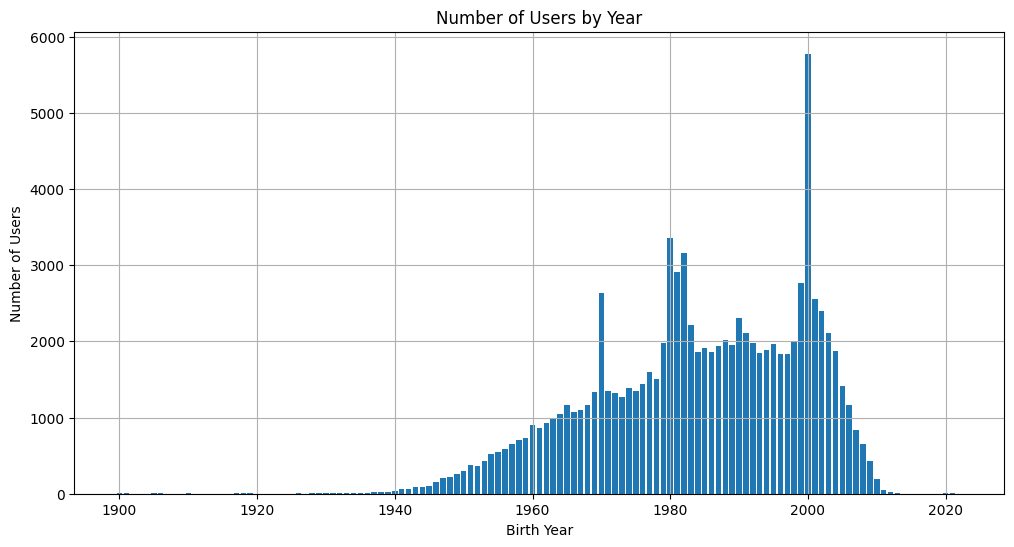

In [ ]:
# Converting BIRTH_DATE to datetime objects (if it's not already)
df_user['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'])

# Extracting the year from the BIRTH_DATE column
df_user['birth_year'] = df_user['BIRTH_DATE'].dt.year

# Grouping by age and count users
age_counts = df_user.groupby('birth_year')['ID'].count()


plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(age_counts.index, age_counts.values)
plt.xlabel("Birth Year")
plt.ylabel("Number of Users")
plt.title("Number of Users by Year")
plt.grid(True)
plt.show()

### Checking the Gender column and user count by Gender


In [ ]:
print(df_user['GENDER'].unique())

['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']


In [ ]:
gender_counts = df_user.groupby('GENDER')['ID'].count().sort_values(ascending=False)
gender_counts

,ID
GENDER,
female,64240
male,25829
transgender,1772
prefer_not_to_say,1350
non_binary,473
unknown,196
not_listed,180
Non-Binary,34
not_specified,28


There are multiple categories for Gender, some of which are the same but are listed separately due to difference in wording

For an easier analysis, similar categories should be grouped together

### Users by State


In [ ]:
import plotly.express as px

# Count users by state
state_counts = df_user.groupby('STATE')['ID'].count().reset_index()

blank_state_users = df_user[df_user['STATE'].isnull()]['ID'].count()
print(f"Number of users with no state: {blank_state_users}")

# Create the map
fig = px.choropleth(state_counts,
                    locations='STATE',
                    locationmode="USA-states",
                    color='ID',
                    scope="usa",
                    title="Users by State")

fig.show()



Number of users with no state: 4812
